### Scope <a class="anchor" id="Goals"></a>

Introduction:<br>
This data analyzation project is being undertaken for the general purpsoe of understanding the effectiveness of online education.<br><br>

Project Scope:<br>
This project will include research, content strategy, writing an article, and publishing it on GitHub. It will also include a Tableau dashboard.<br><br>

Project Deliverables:<br>
Project deliverables will include one well-researched written article of up to 500 words to be delivered to GitHub by May 26th. <br><br>    

Project Acceptance Criteria:<br>
A fellow educator will review and approve the final article version before publishing.<br><br>

Project Exclusions:<br>
None.<br><br>

Project Constraints<br>
Constraints may include communication delays, changes in scope, or technical difficulties.

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:
https://www.kaggle.com/code/bhavinmoriya/exploratory-data-analysis-online-studies/data


#### Loading the Data <a class="anchor" id="section1_1"></a>


In [8]:
# sets up matplotlib with interactive features


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [14]:
student_data = pd.read_csv("students_adaptability_level_online_education.csv")
# see all columns
pd.set_option('display.max_columns', None)
student_data.head()

import warnings
warnings.filterwarnings('ignore')

#### Explore the Data <a class="anchor" id="section1_1"></a>

In [15]:
student_data.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [16]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [17]:
# see what columns have missing data
student_data.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [18]:
print(student_data.describe())

       Gender    Age Education Level Institution Type IT Student Location  \
count    1205   1205            1205             1205       1205     1205   
unique      2      6               3                2          2        2   
top       Boy  21-25          School   Non Government         No      Yes   
freq      663    374             530              823        901      935   

       Load-shedding Financial Condition Internet Type Network Type  \
count           1205                1205          1205         1205   
unique             2                   3             2            3   
top              Low                 Mid   Mobile Data           4G   
freq            1004                 878           695          775   

       Class Duration Self Lms  Device Adaptivity Level  
count            1205     1205    1205             1205  
unique              3        2       3                3  
top               1-3       No  Mobile         Moderate  
freq              840     

In [48]:
student_data.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


#### Let's play with the distribution! <a class="anchor" id="section1_1"></a>

This is the number of students depending on their level of adaptation. 

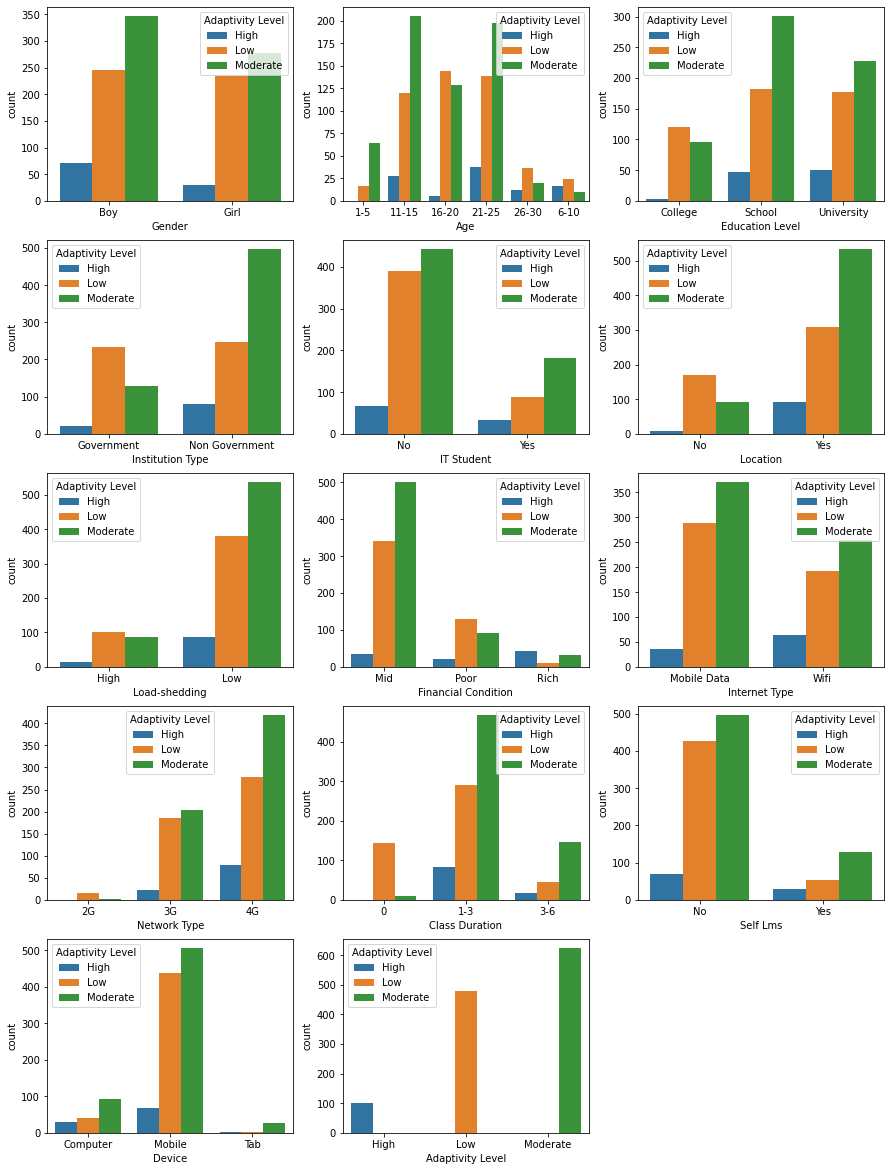

In [ ]:
i = 1
plt.figure(figsize = (15,25))
for feature in student_data:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = student_data)
    i +=1

Start with intial analysis.

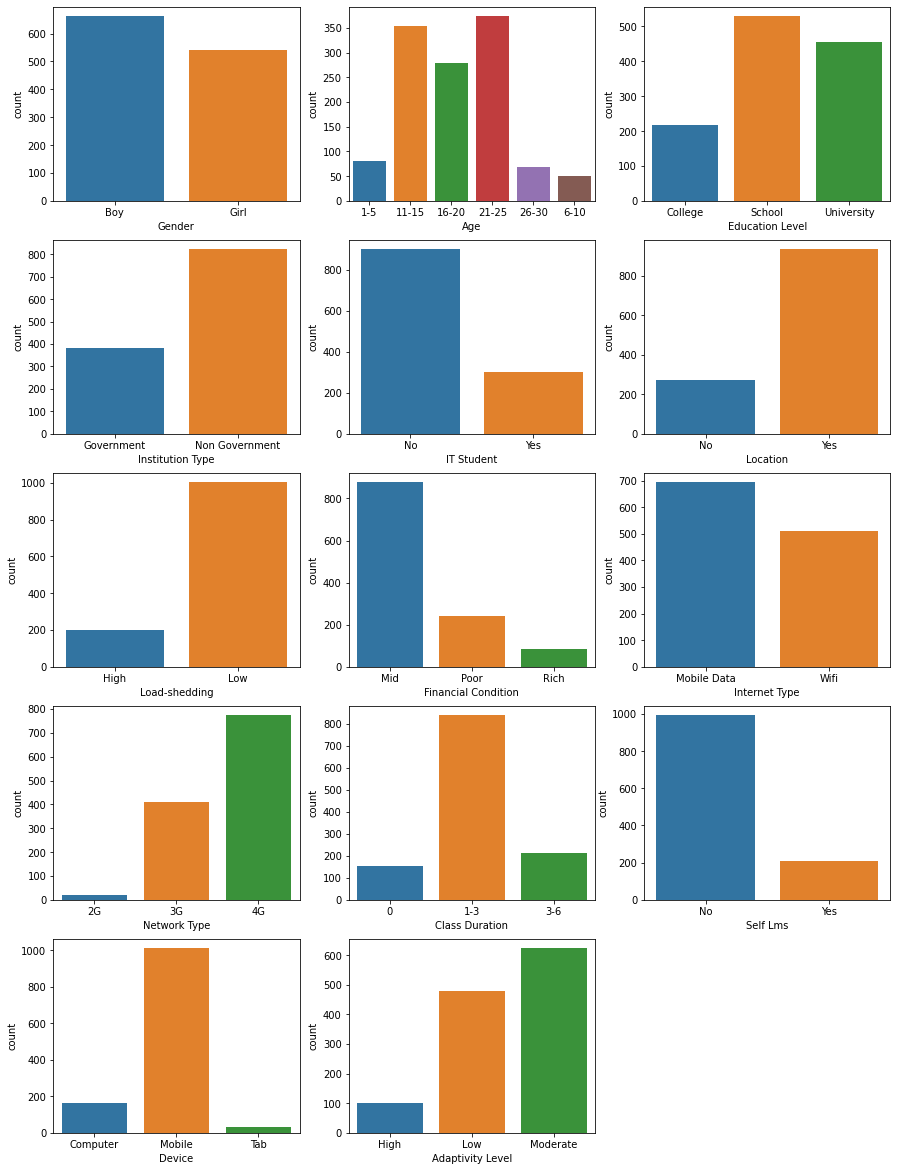

In [ ]:
i = 1
plt.figure(figsize = (15,25))
for feature in student_data:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = student_data)
    i +=1

#### Find a Target Audience

In [51]:
for col in student_data.columns:
        student_data[col] = student_data[col].astype("category")
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               1205 non-null   category
 1   Age                  1205 non-null   category
 2   Education Level      1205 non-null   category
 3   Institution Type     1205 non-null   category
 4   IT Student           1205 non-null   category
 5   Location             1205 non-null   category
 6   Load-shedding        1205 non-null   category
 7   Financial Condition  1205 non-null   category
 8   Internet Type        1205 non-null   category
 9   Network Type         1205 non-null   category
 10  Class Duration       1205 non-null   category
 11  Self Lms             1205 non-null   category
 12  Device               1205 non-null   category
 13  Adaptivity Level     1205 non-null   category
dtypes: category(14)
memory usage: 18.4 KB


(array([374.,   0., 278.,   0., 353.,   0.,  68.,   0.,  51.,  81.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

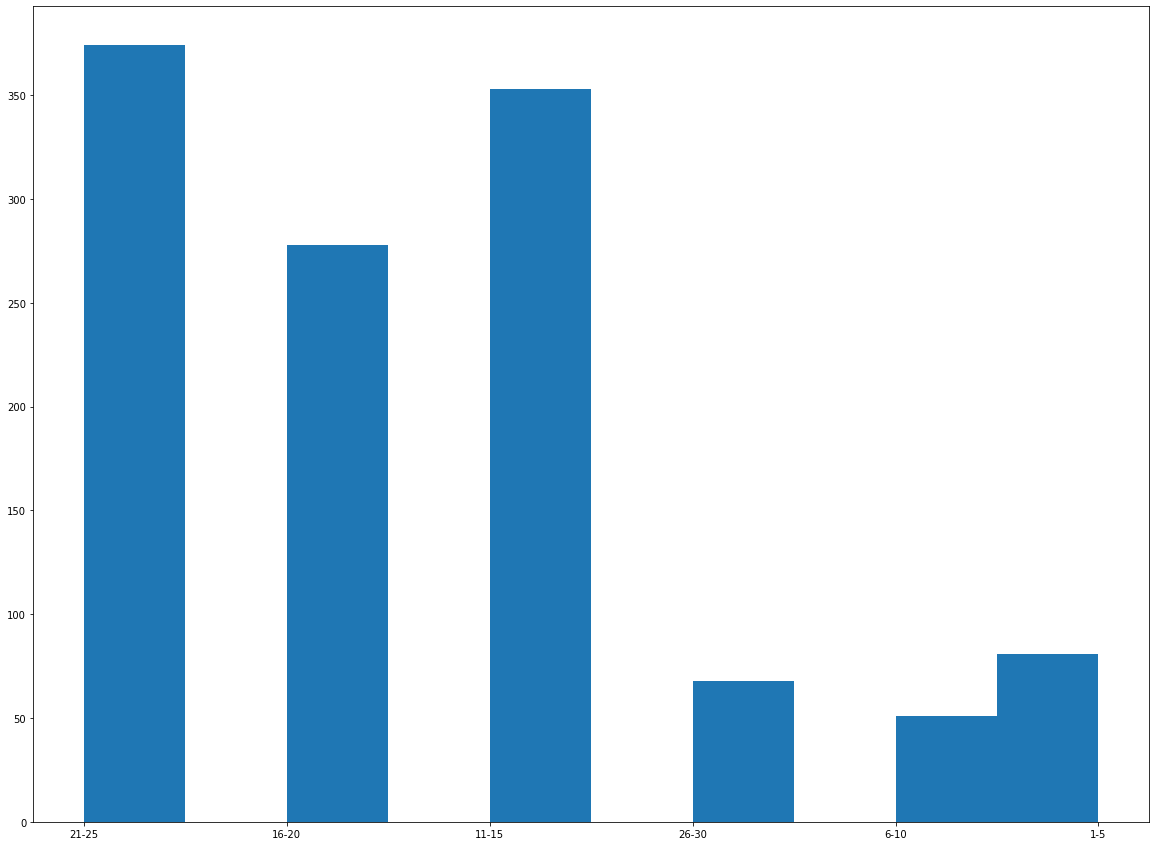

In [56]:
plt.figure(figsize=(20, 15))
plt.hist(data=student_data, x="Age")


In [65]:
group=student_data.groupby(["Gender", "Age","Adaptivity Level" ])["Adaptivity Level"].count().to_frame()

group

Adaptivity Level
Gender Age   Adaptivity Level                  
Boy    1-5   High                             0
             Low                             14
             Moderate                         0
       11-15 High                            23
             Low                             74
             Moderate                       114
       16-20 High                             0
             Low                             40
             Moderate                        69
       21-25 High                            32
             Low                             94
             Moderate                       139
       26-30 High                            12
             Low                             10
             Moderate                        20
       6-10  High                             4
             Low                             13
             Moderate                         5
Girl   1-5   High                             0
             Low                              3
             Moderate                        64
       11-15 High                             5
             Low                             46
             Moderate                        91
       16-20 High                             5
             Low                            104
             Moderate                        60
       21-25 High                             6
             Low                             45
             Moderate                        58
       26-30 High                             0
             Low                             26
             Moderate                         0
       6-10  High                            13
             Low                             11
             Moderate                         5

Text(0.5, 0, 'Adaptivity Count')

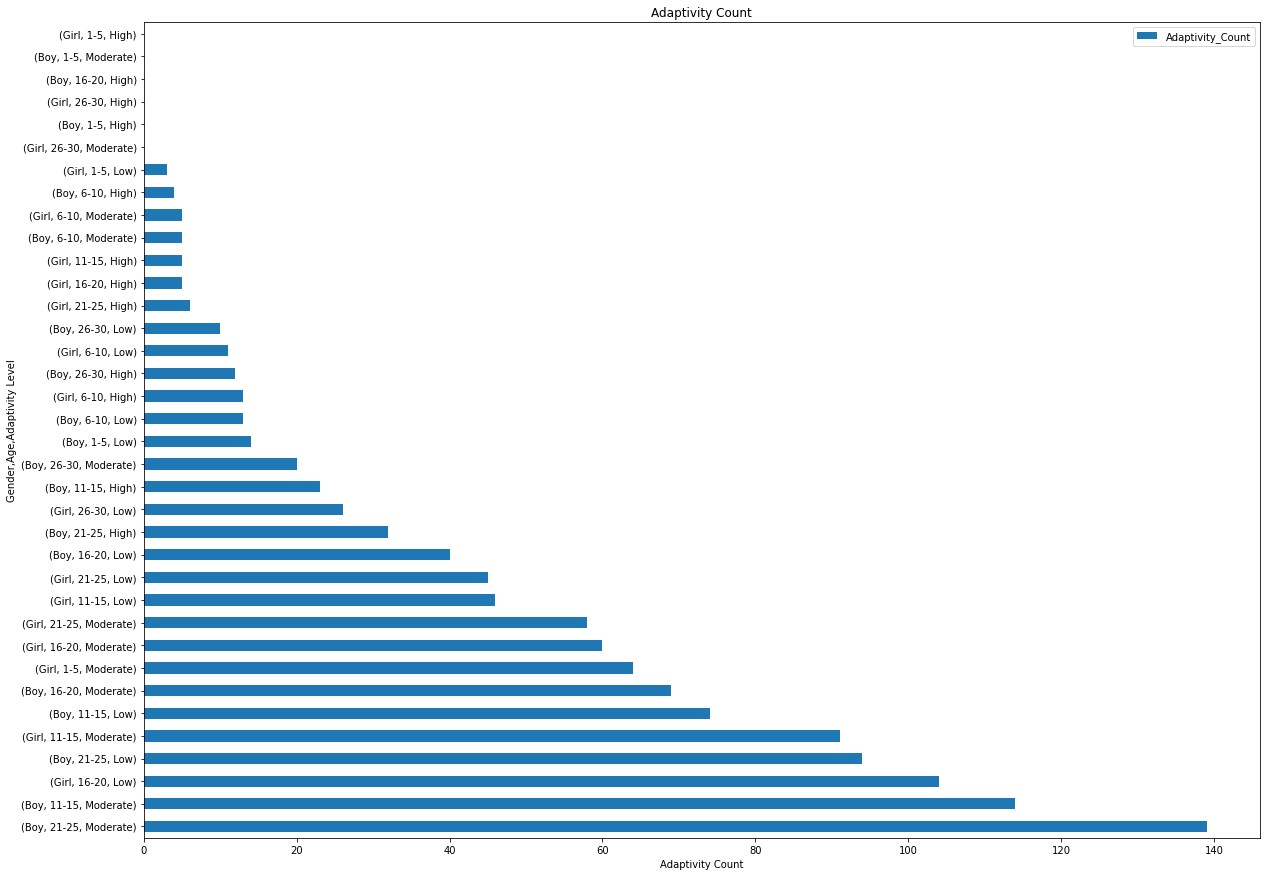

In [68]:
group.columns = ["Adaptivity_Count"]
ax=group.sort_values(by="Adaptivity_Count", ascending=False).plot (kind="barh", figsize=(20, 15), title="Adaptivity Count")
ax.set_xlabel("Adaptivity Count")

If we were looking for an average target market to attact online learners, boys 11-25 would be the target. Boys 11-25 is the largest market with the highest number of adequate online performers.


 58.3% of students did at least moderately well at adapting to online learning, proving that for almost half of the population, 42%, online learning was not best for them. This could lead into all kinds of debates about online education and several more studies could come from this. 